In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [4]:
df = pd.read_csv('CountryCarCrash.csv',encoding='latin-1')
df.head()



,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [5]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [6]:
categorical_data = df.select_dtypes(include=['object','category'])
numerical_data = df.select_dtypes(include=['int','float'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)



for x in numerical_data:
    df[x].fillna(np.mean(df[x]), inplace=True)
df.isnull().sum()


Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

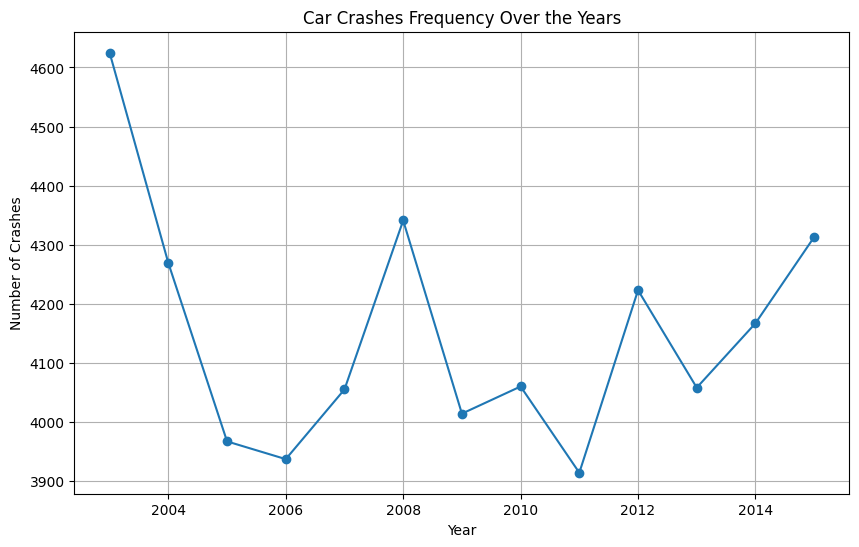

In [7]:

# How does the frequency of car crashes vary over the years in the dataset?
crash_frequency_by_year = df.groupby('Year').size()

#Plotting the data using a line plot
plt.figure(figsize=(10, 6))
plt.plot(crash_frequency_by_year.index, crash_frequency_by_year.values, marker='o', linestyle='-')
plt.title('Car Crashes Frequency Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

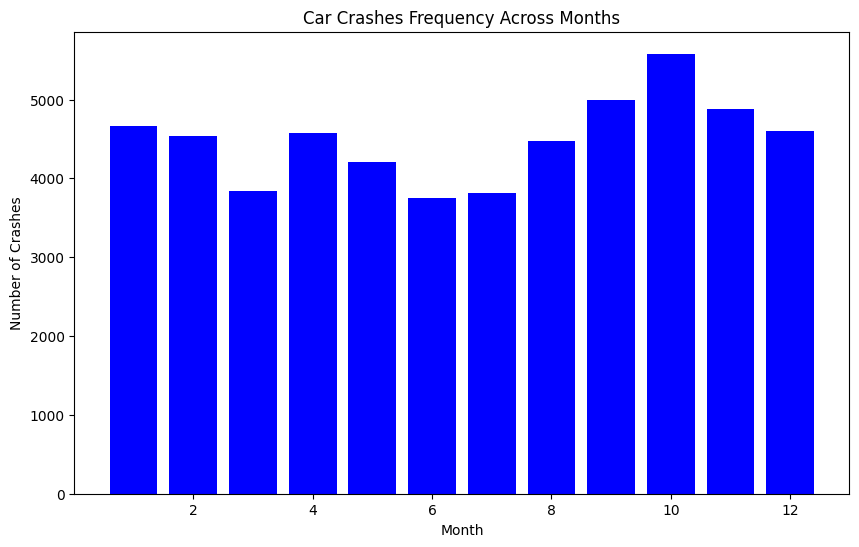

In [8]:
# Are there any specific months with a higher incidence of car crashes?

# Group the data by month and count the number of occurrences
crash_frequency_by_month = df.groupby('Month').size()

# Plotting the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(crash_frequency_by_month.index, crash_frequency_by_month.values, color='blue')
plt.title('Car Crashes Frequency Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()


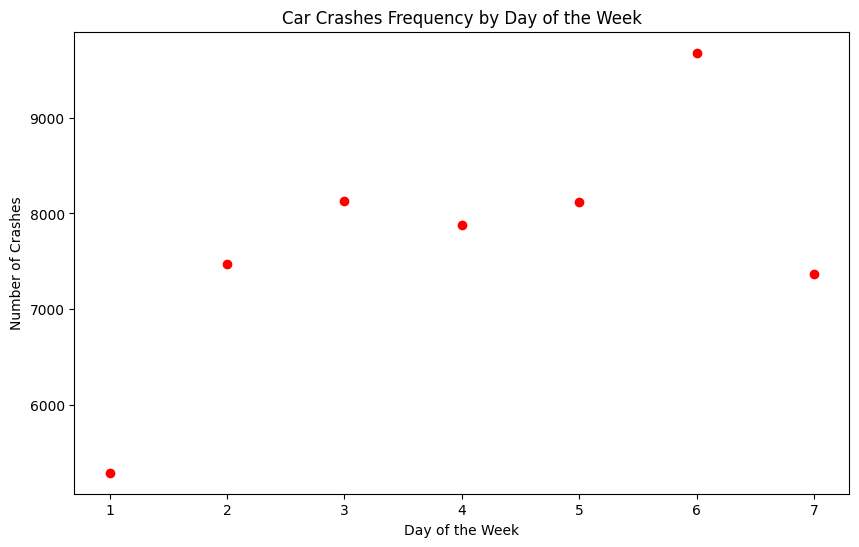

In [9]:
#  Is there a correlation between the day of the week and the occurrence of crashes?

# Group the data by day of the week and count the number of occurrences
crash_frequency_by_day = df.groupby('Day').size()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(crash_frequency_by_day.index, crash_frequency_by_day.values, color='red')
plt.title('Car Crashes Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()


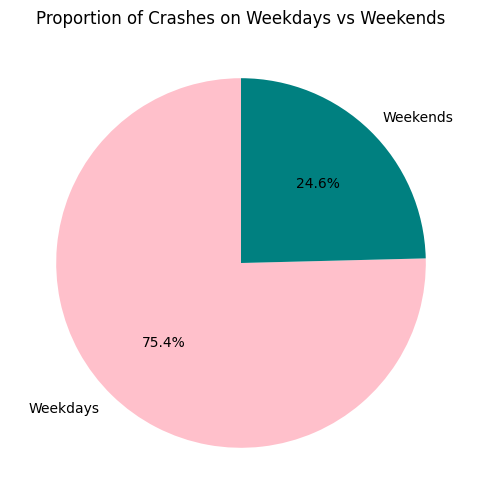

In [10]:
# What proportion of crashes occurs on weekends compared to weekdays?


# Count the number of crashes for weekdays and weekends
weekday_crashes = df[df['Weekend?'] == 'Weekday'].shape[0]
weekend_crashes = df[df['Weekend?'] == 'Weekend'].shape[0]

# Create a pie chart
labels = ['Weekdays', 'Weekends']
sizes = [weekday_crashes, weekend_crashes]
colors = ['pink', 'teal']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Crashes on Weekdays vs Weekends')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

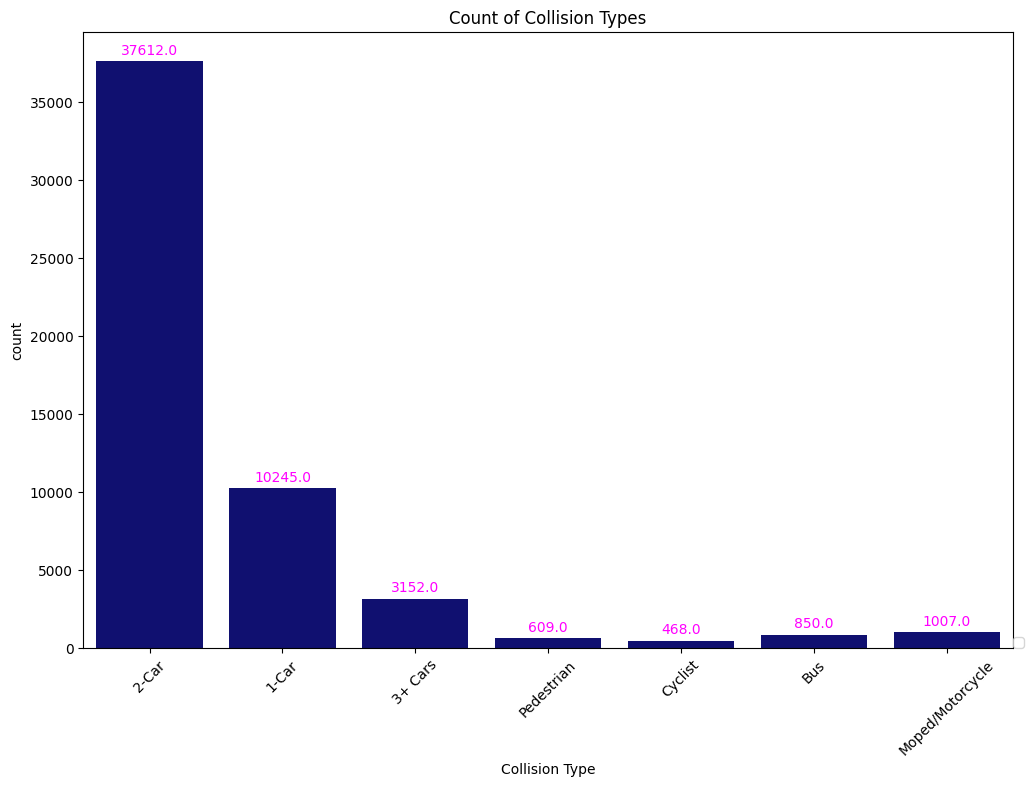

In [11]:
# 	Which collision types are most prevalent in the dataset?
# plotting the data using a count plot
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Collision Type', data=df, color = 'navy')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color = 'magenta', xytext=(0,5),
                textcoords= 'offset points')
    
plt.title('Count of Collision Types')
plt.xticks(rotation=45)
plt.legend(loc=[1,0])
plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

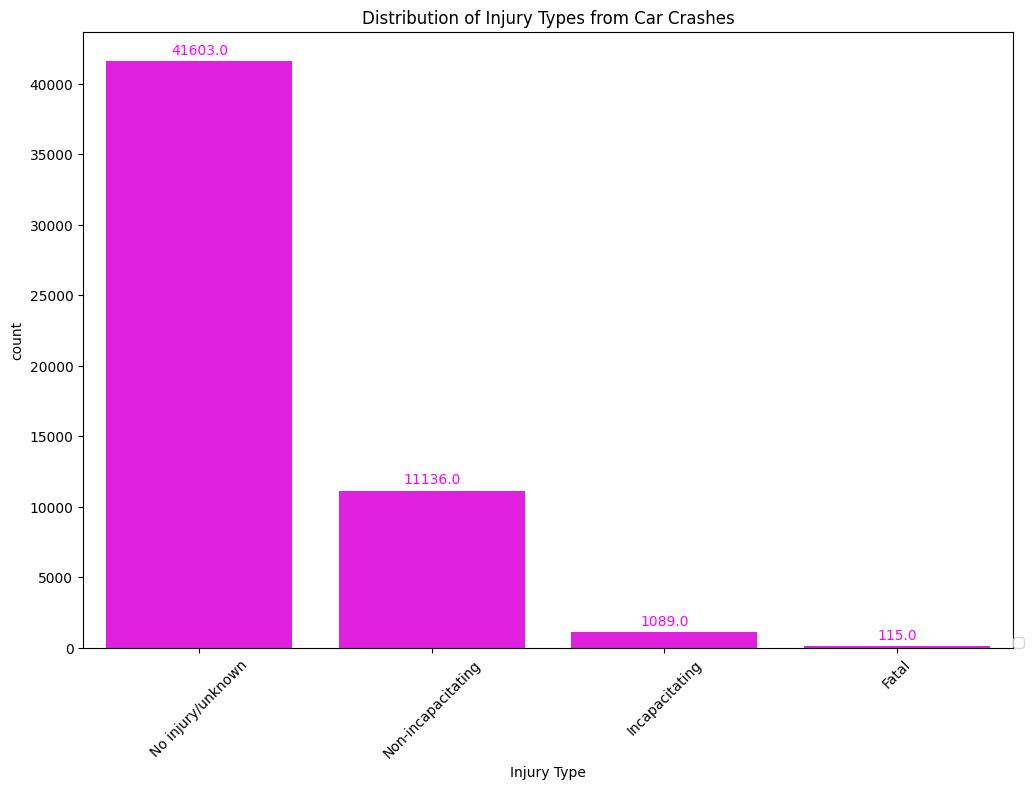

In [12]:
# What is the distribution of injury types resulting from car crashes?
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Injury Type', data=df, color = 'magenta')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color = 'magenta', xytext=(0,5),
                textcoords= 'offset points')
    
plt.title('Distribution of Injury Types from Car Crashes')
plt.xticks(rotation=45)
plt.legend(loc=[1,0])
plt.show

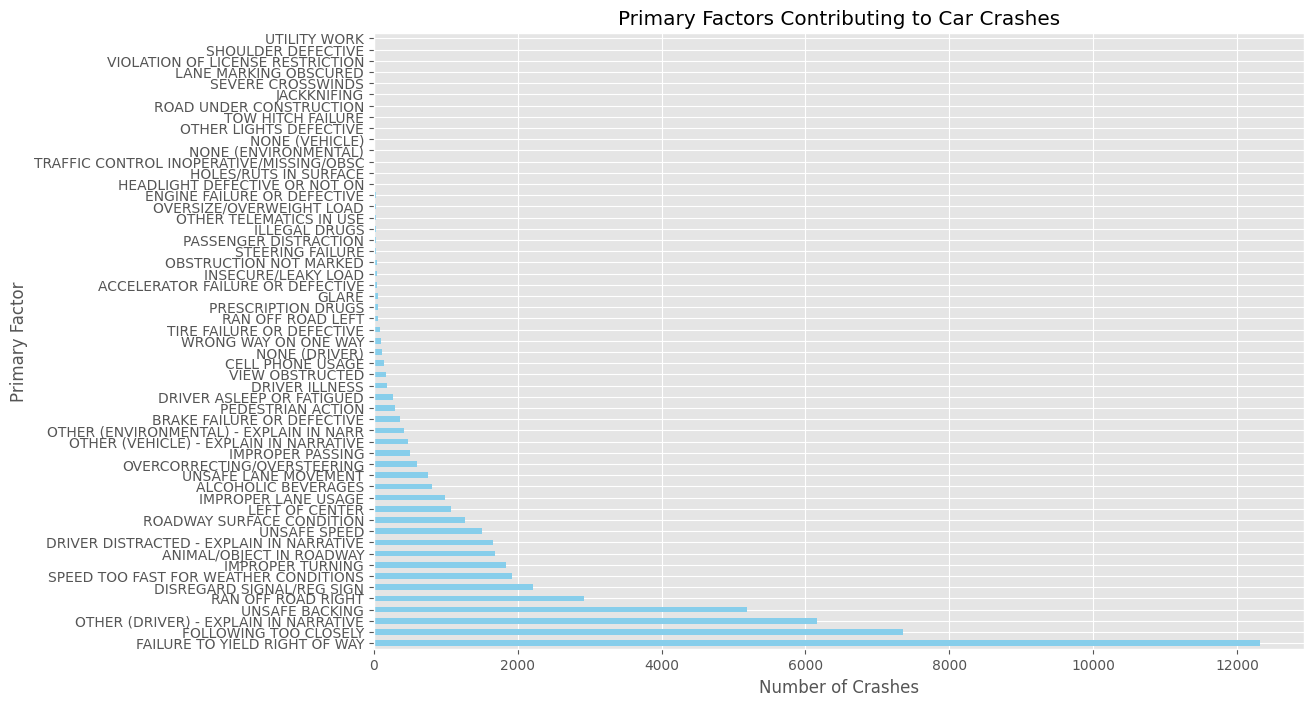

In [13]:
# What are the primary factors contributing to car crashes, and how do they compare in frequency
plt.style.use('ggplot')

# Group the data by primary factors and count the number of occurrences
primary_factor_counts = df['Primary Factor'].value_counts()

# Plotting the data using a horizontal bar chart
plt.figure(figsize=(12, 8))
primary_factor_counts.plot(kind='barh', color='skyblue')
plt.title('Primary Factors Contributing to Car Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Primary Factor')
plt.show()


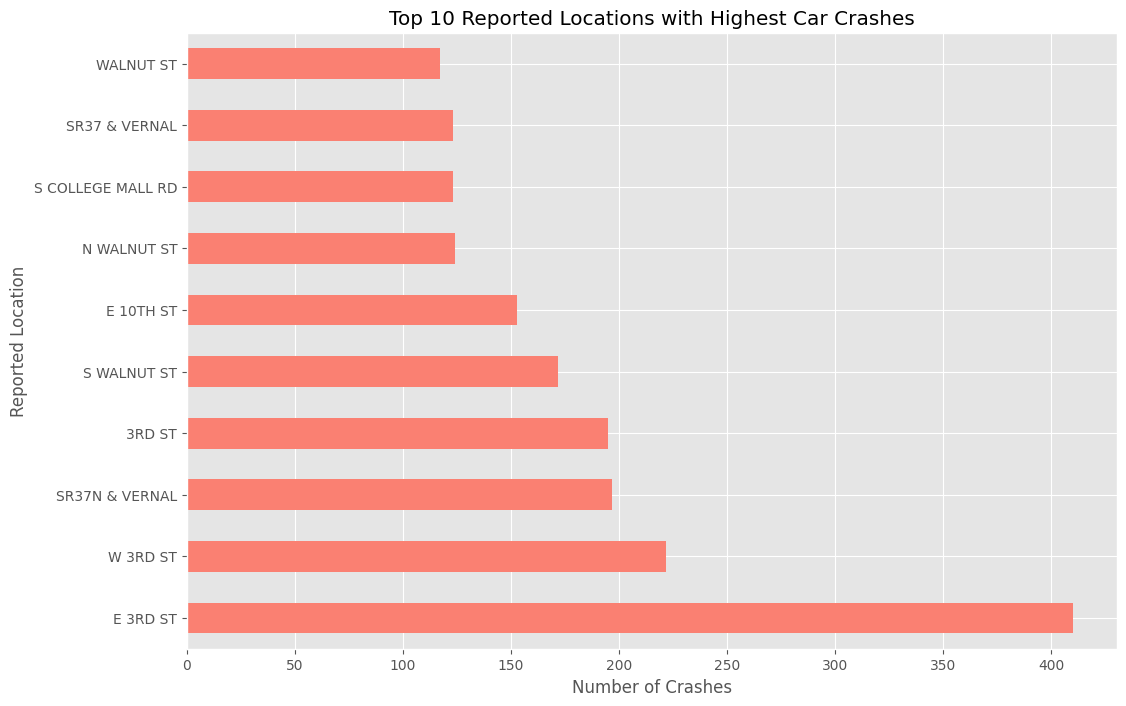

In [14]:
# Which locations have the highest reported instances of car crashes?

# Group the data by reported locations and count the number of occurrences
location_counts = df['Reported_Location'].value_counts().nlargest(10)

# Plotting the data using a horizontal bar chart for the top 10 locations
plt.figure(figsize=(12, 8))
location_counts.plot(kind='barh', color='salmon')
plt.title('Top 10 Reported Locations with Highest Car Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Reported Location')
plt.show()


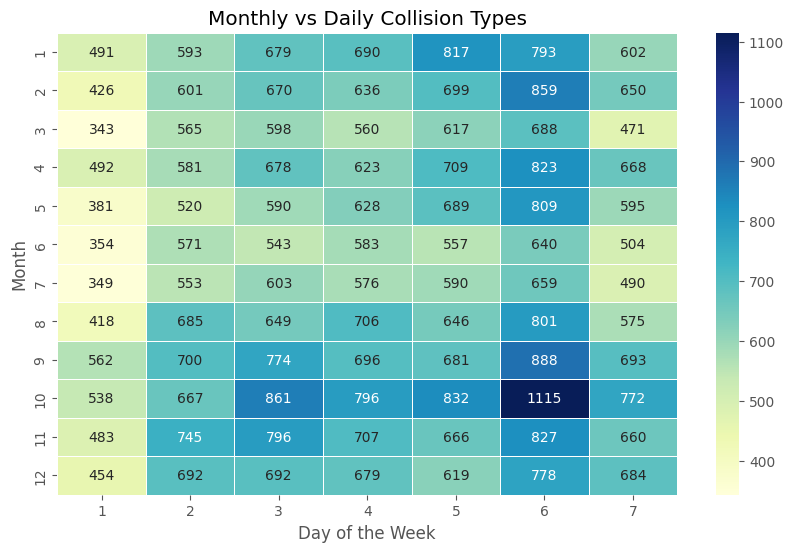

In [15]:
# Are there specific months or days when certain collision types are more likely?

# Create a pivot table with months, days, and collision types
pivot_table = df.pivot_table(index='Month', columns='Day', values='Collision Type', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='0.05g', linewidths=.5)
plt.title('Monthly vs Daily Collision Types')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()


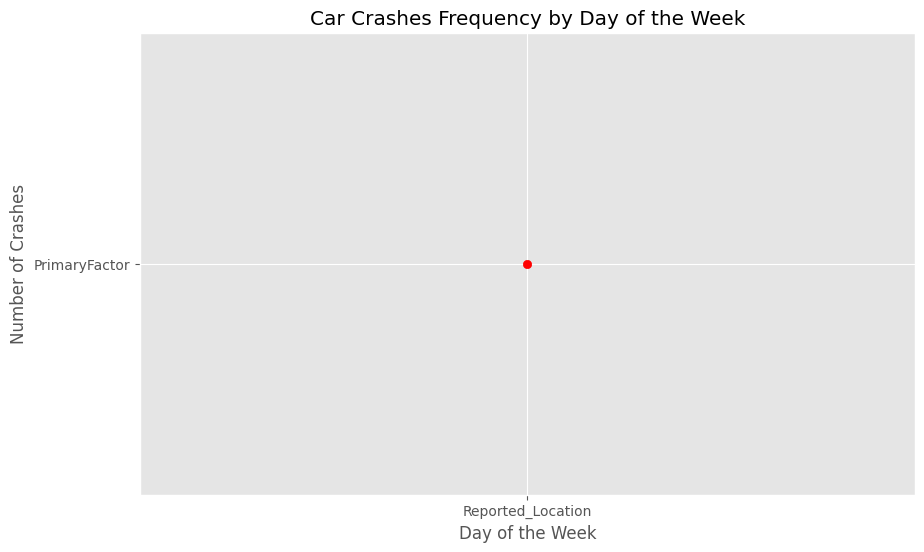

In [17]:
# Is there a correlation between the reported location and the primary factor leading to a crash?

plt.figure(figsize=(10, 6))
plt.scatter('Reported_Location', 'PrimaryFactor', color='red')
plt.title('Car Crashes Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()
